In [1]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

from netCDF4 import Dataset

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})
rcParams.update({'font.size': 18})

/Users/archie/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# import MDT data
infile = '../data/mdt/mdt_cnes_cls2013_global.nc'
mdt_data = Dataset(infile, mode='r')

mdt_data.variables

mdt = np.squeeze(mdt_data.variables['mdt'])
lats = mdt_data.variables['lat'][:]
lons = mdt_data.variables['lon'][:]

lon_mdt, lat_mdt = np.meshgrid(lons, lats)

mdt[mdt<-3] = np.nan

In [5]:
# import the chlorophyll satellite data
chl_file ='/Volumes/GoogleDrive/My Drive/satellite_data/V20140012014365.L3m_YR_NPP_CHL_chlor_a_9km.nc'
chl_data = Dataset(chl_file, mode='r')


chl = chl_data.variables['chlor_a']
lats = chl_data.variables['lat'][:]
lons = chl_data.variables['lon'][:]

lon, lat = np.meshgrid(lons, lats)

bad = (chl<0)
chla = np.ma.masked_where(bad, chl)

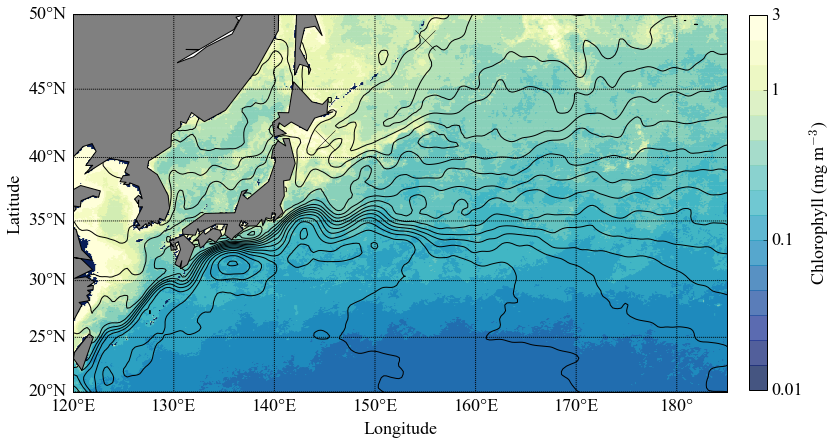

In [22]:
fig0, ax1 = plt.subplots(1, figsize=(12,7), dpi = 300)

m = Basemap(projection='merc',llcrnrlat=20.,urcrnrlat=50.05,\
            llcrnrlon=120.,urcrnrlon=185.,lat_ts=0,resolution='c', ax = ax1)

stn_lon = [145., 155., 160.]
stn_lat = [30., 44., 47.]

sx, sy = m(stn_lon, stn_lat)
m.plot(sx, sx, 'xk', markersize = 20, zorder= 1)


mcon = plt.get_cmap('RdYlBu_r', 30)

xii, yii = m(lon_mdt, lat_mdt)
# mm = m.contourf(xii,yii,mdt, cmap = mcon, vmin = -0.5, vmax = 1.75, lw = 3, zorder = 0, alpha = 0.5)
# m.colorbar(mm)

m.contour(xii,yii,mdt,levels = np.arange(-2, 2, 0.1), colors = 'k', lw = 5, zorder = 1, alpha = 1)

m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey',lake_color='white')

lon, chl = m.shiftdata(lon, datain = chl, lon_0=180)

palette = plt.get_cmap('YlGnBu_r', 15)
palette.set_bad('w',1.0)

#plt.axes([0.025, 0.025, 0.95, 0.95])
xm, ym = m(lon, lat)

# plot colormap of EKE
CS1 = m.pcolormesh(xm, ym, np.log10(chl), shading='flat',cmap = palette, vmin = -2 , vmax = 0.5, alpha = 0.75, zorder = 0)


m.drawparallels(np.arange(-50,80,5),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180,180,10),labels=[0,0,0,1])

plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')
plt.xlabel('Longitude', labelpad = 30)
plt.ylabel('Latitude', labelpad = 50)


cbar = plt.colorbar(CS1, ticks = [-2, -1, 0, 0.5], pad = 0.031, fraction = 0.027)
cbar.ax.set_yticklabels(['0.01', '0.1', '1', '3'])
cbar.ax.tick_params(labelsize=18)
cbar.ax.set_ylabel(r'Chlorophyll (mg m$^{-3}$)', fontsize=18)
plt.tick_params(labelsize=24)


fig0.savefig('../figures/chl_mdt_map.png', dpi = 300)